*First let's load some data to play around with. We'll be examining a composite dataset created from multiple ice core samples in Antarctica, which includes estimates of temperature and carbon concentration over the past 800000 years.*

*The original raw data, a detailed description, relevant papers and other datasets like it can be found at the [NOAA website](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt)*

In [ ]:
# library for downloading files from google drive.
!pip install gdown  

!gdown https://drive.google.com/uc?id=1rh-mSmITFxv3687O-3COUkJqe27TcDtz

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the data from disk
with open('./data/yct.npy', 'rb') as f:
    # the "with" keyword causes the file to be closed automatically after the indented code finished
    # an error in the indented code will also close the file
    yct = np.load(f)
    columns = np.load(f)

*Now check what's in the two variables we loaded from disk.*

In [3]:
# check what we loaded
print(yct.shape)
print(columns)
print(yct)
print(yct[0,1])

(963, 3)
['year' 'CO2 (ppmmv) difference from 1871'
 'temperature (C) difference from 1871']
[[-7.13742e+05 -5.83000e+01 -1.00000e-01]
 [-7.13172e+05 -6.27000e+01 -2.00000e-01]
 [-7.12280e+05 -5.87000e+01 -4.00000e-01]
 ...
 [ 1.72900e+03 -2.50000e+00 -1.90000e+00]
 [ 1.74000e+03 -5.50000e+00 -1.90000e+00]
 [ 1.87100e+03  0.00000e+00  0.00000e+00]]
-58.29999999999998


*We can retrieve the element `yct[i, j]` at row `i` and column `j`.*

**Describe in words what `i` and `j` mean.**

The row/index in the data is selected with i. each i links to a timestamp/index of the dataset.
for each of the timestamp we have three numbers one for each variable
with j (from 0 to 2) we access the collum of the data 
0: year 1: CO2 (ppmmv) difference from 1871, 1:temperature (C) difference from 1871
with j we choose the variables (in this dataset layout)


**Now plot the c02 level and temperature (differences from 1871) as functions of time. Label the axes and use a legend as appropriate.**

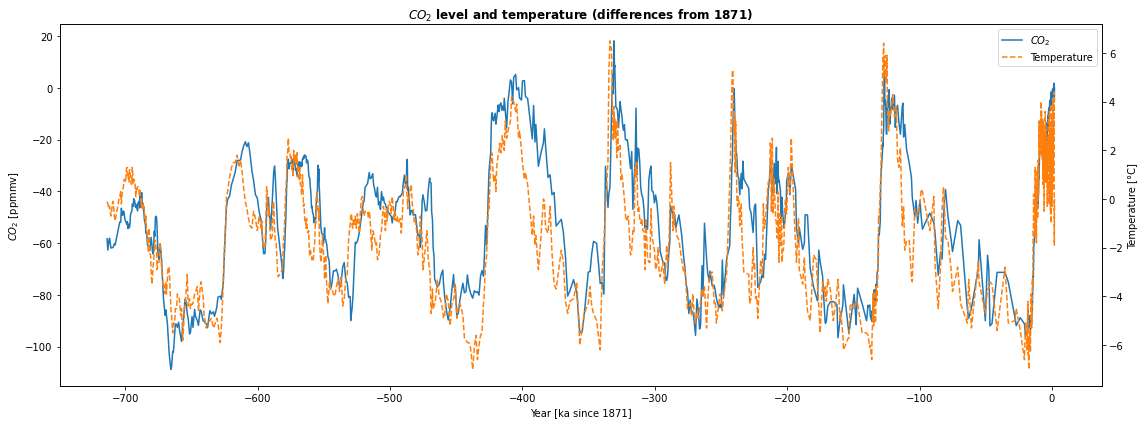

In [4]:
from matplotlib import pyplot as plt
#from matplotlib import rc
#rc("text",usetex=True)

time = yct[:, 0]
co2  = yct[:, 1]
temp = yct[:, 2]

plt.figure(figsize=(16,6),tight_layout=True)
l1 = plt.plot(time/1000, co2, label="$CO_2$")
plt.xlabel("Year [ka since 1871]")
plt.ylabel("$CO_2$ [ppmmv]")
plt.twinx()
l2 = plt.plot(time/1000, temp, label="Temperature",c='#ff7f0e', linestyle = "--")
plt.title("$CO_2$ level and temperature (differences from 1871)", fontweight = "bold")
plt.ylabel("Temperature [°C]")


plt.legend( handles=l1+l2 )
# add more code here

**Describe the graph in words. What do you notice?**

- smaller fluctuations over a nearly periodic signal in both CO2 and Temperature
- correlate with each other
- Temperature usually decreases first after a peak
- peaks roughly at the same time

**Next, do a scatter plot (look up how to do this if needed) comparing C02 concentration (x-axis) vs. temperature (y-axis).**

Text(0.5, 1.0, 'Relation between $CO_2$ and Temperature')

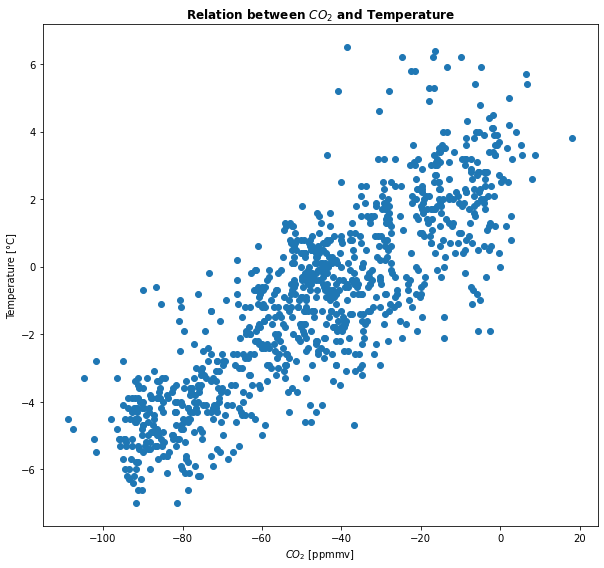

In [5]:
plt.figure(figsize=(8.5,8),tight_layout=True)
plt.scatter(co2,temp, label="$CO_2$")
plt.xlabel("$CO_2$ [ppmmv]")
plt.ylabel("Temperature [°C]")
plt.title("Relation between $CO_2$ and Temperature", fontweight = "bold")


Next, **complete the formula for our simple, 1-input-1-output least squares objective from the lecture, using latex inside a markdown cell (check documentation as needed on how to do this).** Note that you are being asked to write the definition of the loss/objective function, not to minimize it (so far).

We consider the case with one input $x$ (C02 concentration) and one output $y$ (temperature), and no y-intercept. $i$ is an index over data points.

$$\ell(\beta, x, y)= \frac{1}{P}\sum_i (y_i-\beta x_i)^2 $$

**Important:** Make sure you divide both $x$ and $y$ by their means before fitting the linear regression models below. Store these means so you can convert back to original units later. This normalization allows us to use the same learning rates on different problems.

Calculate the least squares objective for values of the slope $\beta$ from 0 to 2.5 in increments of 0.01. Plot $\ell$ as a function of $\beta$ while summing over the full dataset

8.5557936772436


Text(0, 0.5, '$\\ell$')

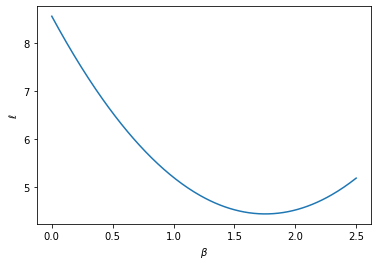

In [6]:
# type code here
mean_x = np.nanmean(co2)
mean_y = np.nanmean(temp)
x = co2  / mean_x
y = temp / mean_y


beta = np.arange(0,2.51,0.01)
l = np.zeros(beta.shape)

for k in range(len(l)):
    l[k] = 1/len(x) * np.sum((y - beta[k]*x)**2)

print(l[0])
plt.plot(beta,l)
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\ell$")

Use the formula from the lecture to find the $\beta$  that minimizes $\ell$ in closed form, and print out the answer.

$$\beta = \frac{\sum_i y_i x_i}{\sum_i x_i x_i} = \frac{x^T\cdot y}{x^T\cdot x}$$

In [34]:
beta_analytical = np.nansum(y*x)/np.nansum(x*x)
beta_analytical = np.dot(np.transpose(x),y)/np.dot(np.transpose(x),x)
print(beta_analytical)

1.7538180718776235


What is the value of $\beta$ if we reverse the normalization of $x$, $y$ and go back to the original units of our data?

In [38]:
x_rev = x * mean_x  # co2
y_rev = y * mean_y # temp

beta_reverse = np.nansum(y_rev*x_rev)/np.nansum(x_rev*x_rev)
beta_reverse = np.dot(np.transpose(x_rev),y_rev)/np.dot(np.transpose(x_rev),x_rev)
print(beta_reverse)

0.037602538362378084


Now let's define a function that calculates

> Indented block


$$g = \frac{1}{P} \sum_i \frac{d\ell(\beta, x_i, y_i)}{d\beta}$$
while summing over all data points (no batching).
* First write a function that does this using a `for` loop over the data points indexed by `i`

In [37]:
def G_1(beta, x, y):
    g = 0
    for i in range(x.shape[0]):
        g += - 2 *(y[i] - beta * x[i]) * x[i]
    return g/x.shape[0]

print(G_1(beta_analytical, x, y))

2.1939298191709998e-16


* Next, use numpy arrays, and use mathematical operations on arrays to avoid writing any `for` loops

In [10]:
def G_2(beta, x, y):
    g = 1/x.shape[0] * np.sum(2*(y - beta *x) * -x)
    return g

print(G_2(beta_analytical, x, y))

-1.475685847892212e-16


## Gradient descent algorithm

Now implement the gradient descent algorithm from the lecture
* Initialize $\beta$ to be zero before any updates.
* First try a learning rate of $\lambda = 1e-4$, but feel free to change it if that gives you better results
* Keep track of $\sum_i \ell$ as $\beta$ is repeatedly updated
* Keep track of the history of $\beta$ values as it is updated.

After updates are finished:

* Plot a $\ell$ as a function of the number of $\beta$ updates, and determine how many updates are needed before $\ell$ no longer reduces. This graph shows a **training curve**
* Plot $\beta$'s value after each update
* Plot the model fit $y \approx \beta x$ after convergence

In [11]:
def L(beta, x, y):
    l = 1/len(x) * np.sum((y - beta*x)**2)
    return l

In [22]:
# note: you can't use lambda as a variable name, since it has a special meaning in python

def Gradient_Descent(x,y,lamb=1e-4):
    beta = 0
    Beta = []
    sum_l = []
    i = 0

    while abs(G_2(beta, x, y)) > 1e-3:

        l = L(beta, x, y)
        #sum_l.append(np.sum(l))
        sum_l.append(l)

        beta += - lamb * G_2(beta, x, y)
        Beta.append(beta)

        i += 1

    print('Found beta = {:.8f} with gradient g = {:.3e} after {:.0f} iterations'.format(beta,G_2(beta, x, y),i))
    return Beta, sum_l, i
#Gradient_Descent(x,y)

**How closely does the $\beta$ value estimated in this way match the closed form solution above?**

diff ausrechnen
depends on Abbruchkriterium

See what happens when you using a different learning rate. What happens when it gets too high or too low?

In [13]:
#type code here
Gradient_Descent(x,y,0.8)
Gradient_Descent(x,y,0.5)
Gradient_Descent(x,y,1e-1)
Gradient_Descent(x,y,1e-2)
Gradient_Descent(x,y,1e-4)
Gradient_Descent(x,y,1e-6)

C:\Users\qraus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\qraus\AppData\Local\Temp\ipykernel_26436\3551375912.py:2: RuntimeWarning: overflow encountered in square
  l = 1/len(x) * np.sum((y - beta*x)**2)
C:\Users\qraus\AppData\Local\Temp\ipykernel_26436\1275189923.py:2: RuntimeWarning: invalid value encountered in multiply
  g = 1/x.shape[0] * np.sum(2*(y - beta *x) * -x)


Found beta = -inf with gradient g = nan after 5312 iterations
Found beta = 1.75351760 with gradient g = -8.042e-04 after 8 iterations
Found beta = 1.75353222 with gradient g = -7.651e-04 after 28 iterations
Found beta = 1.75344830 with gradient g = -9.897e-04 after 312 iterations
Found beta = 1.75344453 with gradient g = -9.998e-04 after 31583 iterations
Found beta = 1.75344445 with gradient g = -1.000e-03 after 3158638 iterations


In [23]:
beta, sum_l, iterations = Gradient_Descent(x,y,1e-4)

Found beta = 1.75344453 with gradient g = -9.998e-04 after 31583 iterations


In [35]:
beta_analytical - beta[-1]

0.000373543974779178

Text(0, 0.5, '$\\beta$')

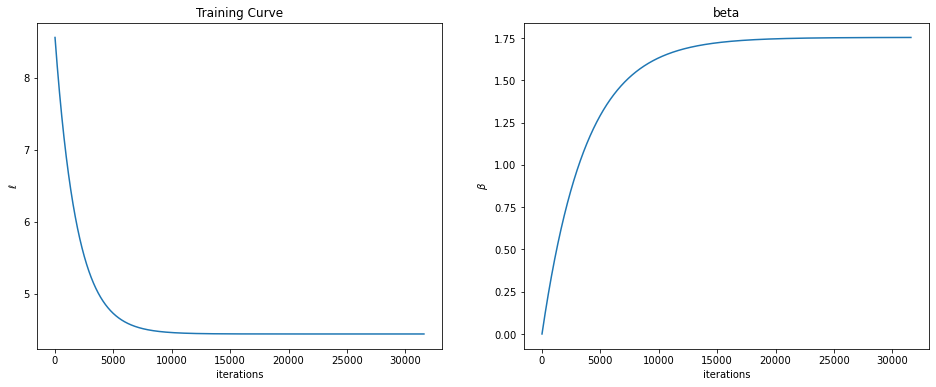

In [41]:
plt.figure(figsize=(8*2,6))
plt.subplot(121)
plt.plot(range(iterations),sum_l)
plt.title("Training Curve")
plt.xlabel("iterations")
plt.ylabel(r"$\ell$")

plt.subplot(122)
plt.plot(range(iterations),beta)
plt.title("beta")
plt.xlabel("iterations")
plt.ylabel(r"$\beta$")

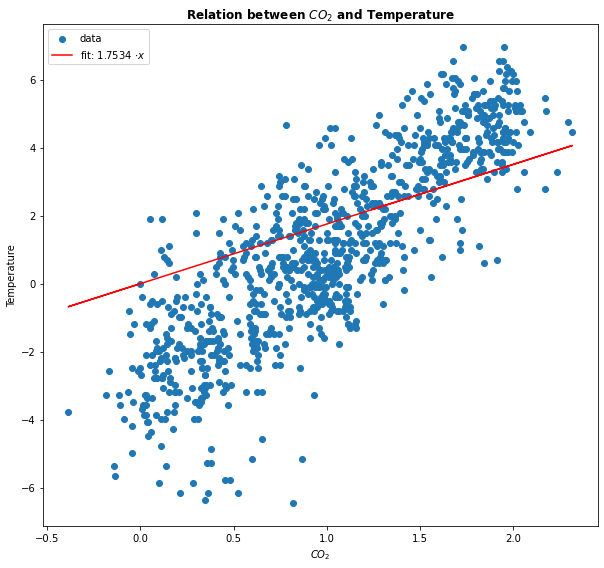

In [33]:
plt.figure(figsize=(8.5,8),tight_layout=True)
plt.scatter(x,y, label="data")
plt.xlabel("$CO_2$")
plt.ylabel("Temperature")
plt.title("Relation between $CO_2$ and Temperature", fontweight = "bold")
plt.plot(x,beta[-1]*x,c="red",label="fit: {:.4f} $\cdot x$".format(beta[-1]))
plt.legend()

(Type answer here)

Now we'll include a constant term in the regression, by adding a second column of ones to the input $x$

* Build $x$ as a 2D array in numpy, with two columns, and in the second column assign every value to be 1.
* Check that the size of $x$ is correct, and print out a few values to be sure.

In [30]:
#type code here
ones = np.ones((x.shape[0], 2))
ones[:,0] = x
X = ones.copy()
print(X.shape)
print(X)

(963, 2)
[[ 1.24159413  1.        ]
 [ 1.33529935  1.        ]
 [ 1.25011279  1.        ]
 ...
 [ 0.0532416   1.        ]
 [ 0.11713152  1.        ]
 [-0.          1.        ]]


Now implement the closed-form formula for regression with multiple inputs from the lecture, and use it to calculate the two elements of $\beta$. 

In [26]:
#type code here

inverse = np.linalg.inv(np.matmul(np.transpose(X),X))
beta_2d = np.matmul(inverse, np.matmul(np.transpose(X),y))


array([ 3.9824543, -2.9824543])

**What are the physical units of each element of $\beta$ (if we reverse the normalization of $x,y$)?**

[x] = ppmmv\
[y] = °C

[β] = °C/ppmmv

## Stochastic gradient descent

Now try to implement stochastic gradient descent as described in the lecture, with minibatches of size 9. Include a column of 1's so that $x$ has two columns, and there are two inputs or each data point.

You may find that the optimal learning rate is different in this case. Since each update of $\beta$ now involves far fewer data points, you may also have to do a great number of total updates to reach convergence.
* Plot the training curve
* Describe how this curve may be different than gradient descent on the full dataset. Any idea why?

In [147]:
def stochastic_gradient_descent(runs, lamb, X, y, batch_size=9):   
    beta_rand = np.zeros((2,1))
    X_rand = X.copy()
    Beta = np.zeros((runs,2))
    L = []
    
    for run in range(runs):
        r = np.arange(0,len(x))
        idx = np.random.permutation(r) # in order to permutate x and y the same way
        x_rand = x[idx]
        y_rand = y[idx]
        y_rand = y_rand.reshape((len(y_rand), 1))

        X_rand[:,0] = x_rand

        for i in range(int(len(x)/batch_size)):
            x_temp = X_rand[i*batch_size:(i+1)*batch_size,:]
            y_temp = y_rand[i*batch_size:(i+1)*batch_size]
            g = (- 2 * np.matmul(np.transpose(y_temp),x_temp) + 2 * np.matmul(np.transpose(beta_rand),np.matmul(np.transpose(x_temp), x_temp)))#(1/ batch_size) *
            beta_rand += - lamb * np.transpose(g)
            
        #print(run) 
        helper = y_rand - np.matmul(X_rand,beta_rand)
        #print(np.matmul(X_rand,beta_rand).shape,y_rand.shape,helper.shape)
        l =  np.matmul(np.transpose(helper), helper)#(1/ batch_size) *
        #print(np.squeeze(l))
        L.append(np.squeeze(l))
        Beta[run,:] = np.squeeze(beta_rand)
        #print(Beta)
        #if run%50==0:
            #print(np.squeeze(beta_rand))
            
    return Beta, L

Text(0, 0.5, 'Runs')

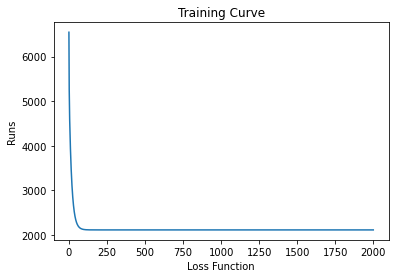

In [149]:
lamb = 1e-4
beta, l = stochastic_gradient_descent(2000, lamb, X, y)
plt.plot(range(runs),l)
plt.title("Training Curve")
plt.xlabel("Loss Function")
plt.ylabel("Runs")

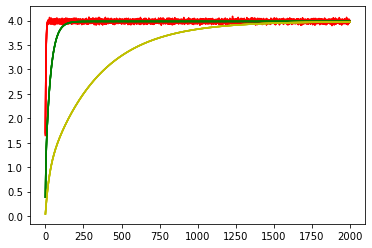

In [150]:
color = ["r","g","y"]
j = 0
for lamb in [1e-3,1e-4,1e-5]:
    for i in range(5):
        beta , l = stochastic_gradient_descent(2000, lamb, X, y)
        plt.plot(beta[:,0],c=color[j])
    j +=1

(Type answer here)

## Intro to PyTorch and automatic differentiation

Next we're going to get used to PyTorch. PyTorch is very similar to NumPy in that it manipulates array with mathematical operations. But there are two key differences:

* PyTorch supports efficient GPU computation when the right hardware is available.
* PyTorch allows us to calculate the derivatives (also known as gradients) of the programs we write. That is, if we define a function $f(x)$ for any input $x$ in PyTorch, we can use PyTorch library functions to calculate $\frac{d f(x)}{dx}$.

Let's try this with the simple function $f(x) = x^2$.

In [42]:
def f(x):
    return x * x

We'll use numpy to calculate $f(x)$ for $x = 0, 1, 2, 3, 4, 5$.

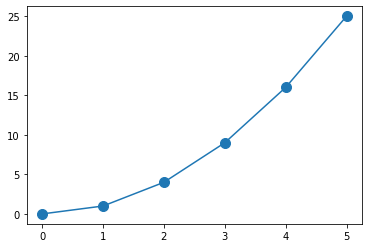

In [43]:
x = np.array([0, 1, 2, 3, 4, 5], dtype=float)

y = f(x)

plt.plot(x, y, '.-', markersize=20)

Now we'll use PyTorch to do the same calculation.

First, note that arrays in pytorch are called "tensors."

In [44]:
import torch
x_t = torch.tensor(x)  # convert from numpy to pytorch

y_t = f(x_t)

ModuleNotFoundError: No module named 'torch'

Note that we didn't have to change our function $f$ to work on PyTorch tensors instead of numpy arrays or simple Python numbers. For this very simple function, all that happens is that we use the multiplication operator `*` and return a value. Since this operator supports numpy arrays, pytorch tensors and simple numeric variables in python, we can use any of these as an input.

If we needed separate code depending on the kind of object $x$ is, we could check and use `if` statements accordingly.

### Automatic differentiation

We know from basic differential calculus that when $f(x) = x^2$, then $\frac{d f(x)}{dx} = 2x$. Let's use PyTorch to do the same calculation. There are two concepts we'll need to implement this:
* `requires_grad` is a flag we can set to true on any torch array, to tell PyTorch that we want to calculate derivatives with respect to this array. Essentially, by setting `x.requires_grad = True` we are saying that $x$ will be in the denominator of some $\frac{dy}{dx}$ that we want to calculate.
* The `.backward()` method calculates the derivatives (gradients) of a scalar $s$ (a single real value) in PyTorch with respect to all arrays $x$ with `requires_grad == True` that was used somewhere in the calculation of $s$. The resulting derivatives $\frac{ds}{dx}$ will be stored in `x.grad`for all the arrays on which $s$ directly or indirectly depends.

However, we don't want $\frac{ds}{dx_i}$ for each element $x_i$ of $x$, we want $\frac{d f(x_i)}{dx_i}$ for each $i$.
To make the `.backward()` method do the calculation we want, we'll define $s = \sum_i f(x_i)$, so that $\frac{ds}{dx_i} = \frac{d f(x_i)}{dx_i}$.

Here "A depends on B" means that B was used in some calculations that were used to produce A. This includes indirect relations where C depends on B, and B depends on A.

If this seems confusing, just try it out and see! Read the comments on each line of code carefully, as they explain concepts we'll need later!

In [ ]:
x_t = torch.tensor(x)  # convert from numpy to pytorch
x_t.requires_grad = True  # tell PyTorch we want to take derivatives of something with respect to this variable

y_t = f(x_t)  # calculate the function. this is the "forward step"
s = torch.sum(y_t)  # add up f(x) for all x
s.backward()  # calculate derivatives of s with respect to all variables it depends on that have requires_grad == True
g = x_t.grad  # store the calculated gradients. this is the "backward step"

g_np = g.detach().numpy()  # go back to numpy for plotting purposes

# plot using numpy arrays. plotting using pytorch arrays for which requires_grad == True will fail!
plt.plot(x, g_np, '.-', markersize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('$\\frac{d f(x)}{dx}$', fontsize=20, rotation=0, horizontalalignment='right')

Now try it yourself, using the same $x$ as before and implementing these relations and calculating the gradients $\frac{dw}{dz}$:

$$y = \sin(x)\\
z = y^2 \\
w = 1 - 3z\\
$$

* In the next code block, calculate $y, z, w$ and the gradients $\frac{dw}{dx}$. Plot everything as a function of $x$.
* Calculate gradients automatically using PyTorch
* Compare to by-hand calculations from previous exercises, and plot the results side-by-side

**Hint** You should be able to do this with a single call to `s.backward()` at the end of your calculations. **Warning:** if `s.backward()` is called twice, the corresponding `.grad` fields for the arrays used to compute `s` will have twice the correct value.

In [ ]:
# calculate y,z,w in pytorch

In [ ]:
# calculate gradients automatically

In [ ]:
# calculate gradients using formula from last exercises

In [ ]:
# compare results

Now use automatically calculated gradients to run a (stochastic) gradient descent loop. Make sure you wrap the beta updates in a `torch.no_grad()` block, since we don't want to differentiate the updates. We also need to reset the derivative information after each update. We'll explain how/why this works next week.

Plot the training curve, predictions, etc. as before

A rough outline of the code has been started below

In [ ]:
LR = ... # learning rate
beta = torch.zeros(n, requires_grad=True)
for i in range(...):
    yhat = 
    loss = ...
    loss.backward()
    with torch.no_grad():
        beta -= beta.grad * LR
        beta.grad.zero_()

**Optional, extra credit exercise (+25% of homework points)**

We'll conclude with an experiment. First, let's generate some data for both $X$ (1000 inputs) and $y$ (one output). We have 10 data points.

In [ ]:
X = np.random.rand(10, 1000)
y = np.random.rand(10)

* What happens when you try to solve for the slopes $\beta$ that minimize $\ell$?
* How accurate is your prediction when training for a long time with gradient descent / sgd?
* How is it possible to have any success at all in predicting $y$ from $X$, when $X$ and $y$ are random and do not depend on each other?
* What if you use the first 5 points to fit $\beta$, then test accuracy on the next 5?
* Can you fix the closed form solution by using `np.linalg.solve` instead of `np.linalg.inv`. Why does this help? How does the resulting $\beta$ perform if you split the data points between testing and training sets?

In [ ]:
#type code here